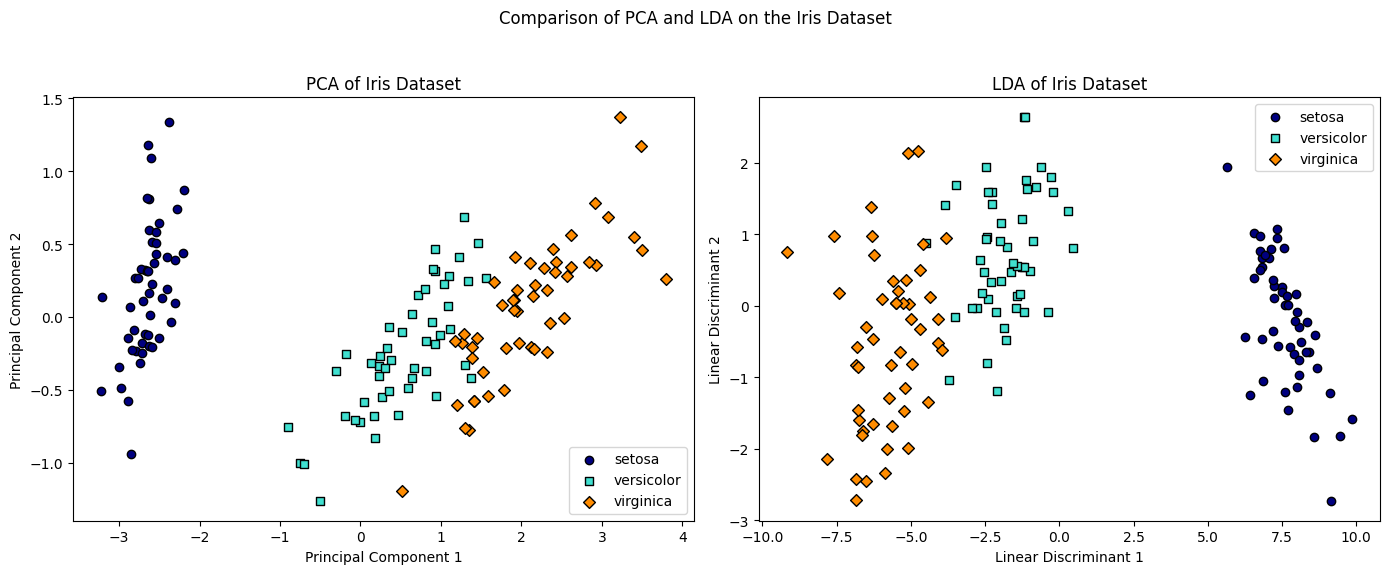

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load the Iris dataset
iris = load_iris()
X = iris.data        # Feature matrix of shape (150, 4)
y = iris.target      # Target labels
target_names = iris.target_names

# -------------------------------------
# 1. Reduce dimensions using PCA (4 -> 2)
# -------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# -------------------------------------
# 2. Reduce dimensions using LDA (4 -> 2)
# Note: For LDA, n_components is limited to n_classes - 1.
# With 3 classes in Iris, we can have up to 2 LDA components.
# -------------------------------------
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# -------------------------------------
# 3. Plotting the new feature spaces
# -------------------------------------
colors = ['navy', 'turquoise', 'darkorange']
markers = ['o', 's', 'D']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot PCA result
for color, marker, i, target_name in zip(colors, markers, [0, 1, 2], target_names):
    axes[0].scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                    color=color, marker=marker, label=target_name, edgecolor='k')
axes[0].set_title('PCA of Iris Dataset')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()

# Plot LDA result
for color, marker, i, target_name in zip(colors, markers, [0, 1, 2], target_names):
    axes[1].scatter(X_lda[y == i, 0], X_lda[y == i, 1],
                    color=color, marker=marker, label=target_name, edgecolor='k')
axes[1].set_title('LDA of Iris Dataset')
axes[1].set_xlabel('Linear Discriminant 1')
axes[1].set_ylabel('Linear Discriminant 2')
axes[1].legend()

plt.suptitle("Comparison of PCA and LDA on the Iris Dataset")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
